In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
single_image=x_train[0]

In [10]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

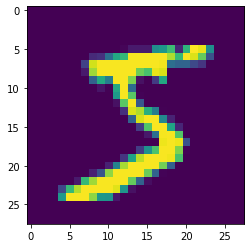

In [11]:
plt.imshow(single_image)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_example=to_categorical(y_train)

In [16]:
y_train.shape

(60000,)

In [18]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [20]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [21]:
single_image.max()

255

In [22]:
single_image.min()

0

In [23]:
x_train=x_train/255

In [24]:
x_test=x_test/255

In [25]:
scaled_image=x_train[0]

In [26]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

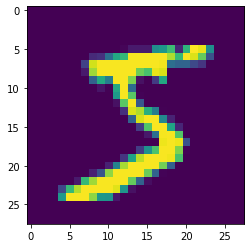

In [27]:
plt.imshow(scaled_image)

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
# batch_size,width,height,color_channels
x_train=x_train.reshape(60000,28,28,1)

In [30]:
x_test=x_test.reshape(10000,28,28,1)

In [31]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [34]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#OUTPUT LAYER
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [37]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 781us/sample - loss: 0.1357 - accuracy: 0.9593 - val_loss: 0.0538 - val_accuracy: 0.9833
Epoch 2/10
60000/60000 [==============================] - 39s 645us/sample - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0404 - val_accuracy: 0.9866
Epoch 3/10
60000/60000 [==============================] - 46s 765us/sample - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0437 - val_accuracy: 0.9858


In [38]:
metrics=pd.DataFrame(model.history.history)

In [39]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.135699,0.959317,0.053777,0.9833
1,0.047380,0.985117,0.040404,0.9866
2,0.031017,0.990367,0.043747,0.9858


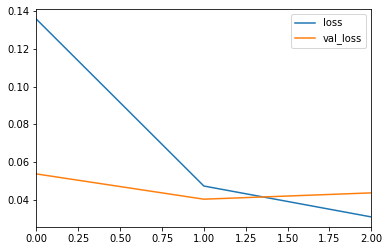

In [40]:
metrics[['loss','val_loss']].plot()

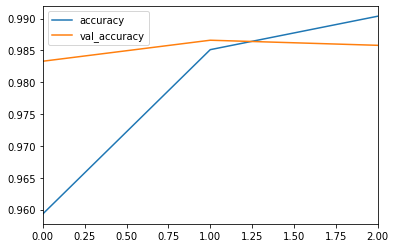

In [41]:
metrics[['accuracy','val_accuracy']].plot()

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04374731184989214, 0.9858]

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
predictions=model.predict_classes(x_test)

In [46]:
y_cat_test.shape

(10000, 10)

In [47]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.95      1.00      0.97      1010
           4       0.99      0.98      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [49]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    1,    0,    0,    2,    0,    0,    0],
       [   2, 1126,    1,    2,    0,    0,    3,    0,    1,    0],
       [   2,    0, 1011,   10,    0,    0,    0,    7,    2,    0],
       [   0,    0,    1, 1008,    0,    0,    0,    0,    1,    0],
       [   2,    0,    1,    0,  966,    0,    2,    0,    1,   10],
       [   1,    0,    1,   19,    0,  870,    1,    0,    0,    0],
       [   8,    1,    0,    0,    2,    1,  943,    0,    3,    0],
       [   1,    1,    3,    7,    0,    0,    0, 1012,    1,    3],
       [   4,    1,    1,    3,    0,    0,    1,    1,  963,    0],
       [   1,    2,    0,   13,    4,    3,    0,    1,    3,  982]],
      dtype=int64)

In [50]:
import seaborn as sns

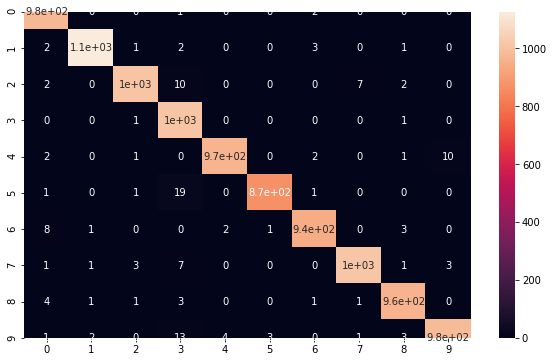

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [55]:
my_number=x_test[0]

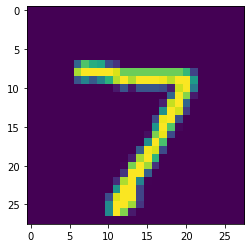

In [54]:
plt.imshow(my_number.reshape(28,28))

In [57]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)